In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
df = pd.read_csv('./datasets/train.csv')

In [6]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
df.shape

(2051, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

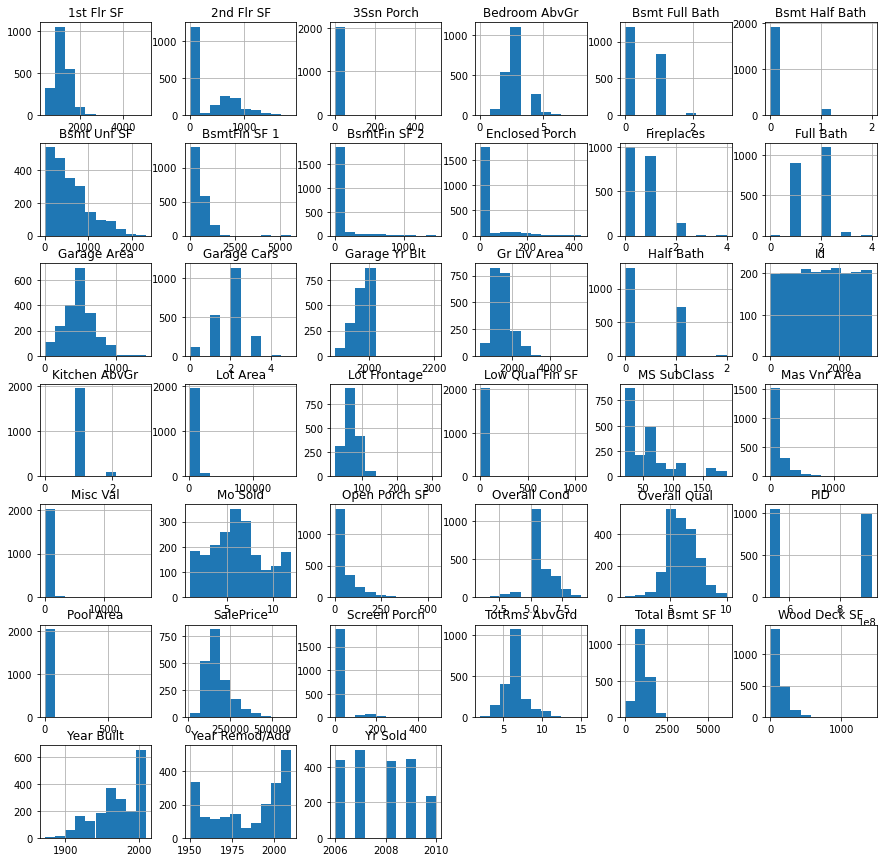

In [11]:
df.hist(figsize=(15,15))
plt.show()

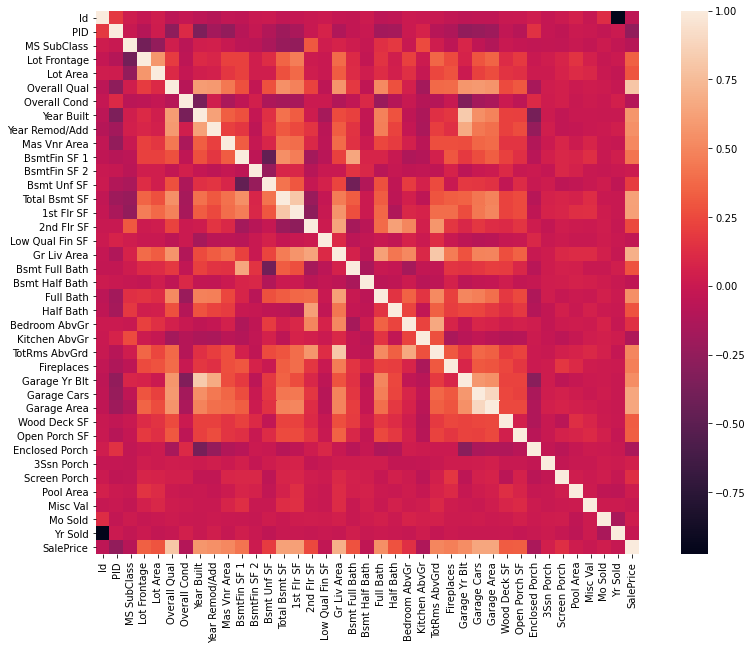

In [21]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), square=True)

In [12]:
correl = df.corr()
correl['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

We see that there is strong colinearity found between garage area and garage cars, in addition to total basement square footage, and first floor square footage. There are some smaller instances of possible colinearity found between total rooms above ground and ground living area, as well as year built and garage year built. Removing garage year built seems safe; and removing garage cars and basement square footage seems necessary.

In [22]:
firstpoke = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF', 'Year Built', 'Year Remod/Add']

In [23]:
helpme = df[firstpoke]

In [29]:
helpme.info

<bound method DataFrame.info of       SalePrice  Overall Qual  Gr Liv Area  Garage Area  1st Flr SF  \
0        130500             6         1479        475.0         725   
1        220000             7         2122        559.0         913   
2        109000             5         1057        246.0        1057   
3        174000             5         1444        400.0         744   
4        138500             6         1445        484.0         831   
...         ...           ...          ...          ...         ...   
2046     298751             8         1728        520.0        1728   
2047      82500             4          861        539.0         861   
2048     177000             6         1913        342.0        1172   
2049     144000             4         1200        294.0        1200   
2050     189000             7         1804        442.0        1028   

      Year Built  Year Remod/Add  
0           1976            2005  
1           1996            1997  
2         

In [30]:
target = helpme['SalePrice']

In [33]:
target.head(8)

0    130500
1    220000
2    109000
3    174000
4    138500
5    190000
6    140000
7    142000
Name: SalePrice, dtype: int64

In [37]:
lr = LinearRegression()

In [39]:
helpme.isnull().sum()

SalePrice         0
Overall Qual      0
Gr Liv Area       0
Garage Area       1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
dtype: int64

In [40]:
helpme.fillna(0)

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,1st Flr SF,Year Built,Year Remod/Add
0,130500,6,1479,475.0,725,1976,2005
1,220000,7,2122,559.0,913,1996,1997
2,109000,5,1057,246.0,1057,1953,2007
3,174000,5,1444,400.0,744,2006,2007
4,138500,6,1445,484.0,831,1900,1993
...,...,...,...,...,...,...,...
2046,298751,8,1728,520.0,1728,2007,2007
2047,82500,4,861,539.0,861,1940,1950
2048,177000,6,1913,342.0,1172,1928,1950
2049,144000,4,1200,294.0,1200,1956,1956


In [42]:
helpme.drop('SalePrice',axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
helpme.head()

,Overall Qual,Gr Liv Area,Garage Area,1st Flr SF,Year Built,Year Remod/Add
0,6,1479,475.0,725,1976,2005
1,7,2122,559.0,913,1996,1997
2,5,1057,246.0,1057,1953,2007
3,5,1444,400.0,744,2006,2007
4,6,1445,484.0,831,1900,1993


In [44]:
lr.fit(helpme,target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [45]:
target.isnull().sum()

0

In [46]:
helpme.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Area       1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
dtype: int64

In [47]:
helpme = helpme.fillna(0)

In [48]:
helpme.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Area       0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
dtype: int64

In [49]:
lr.fit(helpme,target)

LinearRegression()

In [50]:
dftest = pd.read_csv('./datasets/test.csv')

In [51]:
secondpoke = ['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF', 'Year Built', 'Year Remod/Add']

In [52]:
testdata = dftest[secondpoke]

In [53]:
preds = lr.predict(helpme)

In [57]:
firstrmse = np.sqrt(mean_squared_error(target,preds))

In [58]:
firstrmse

36550.17418473804

In [62]:
df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


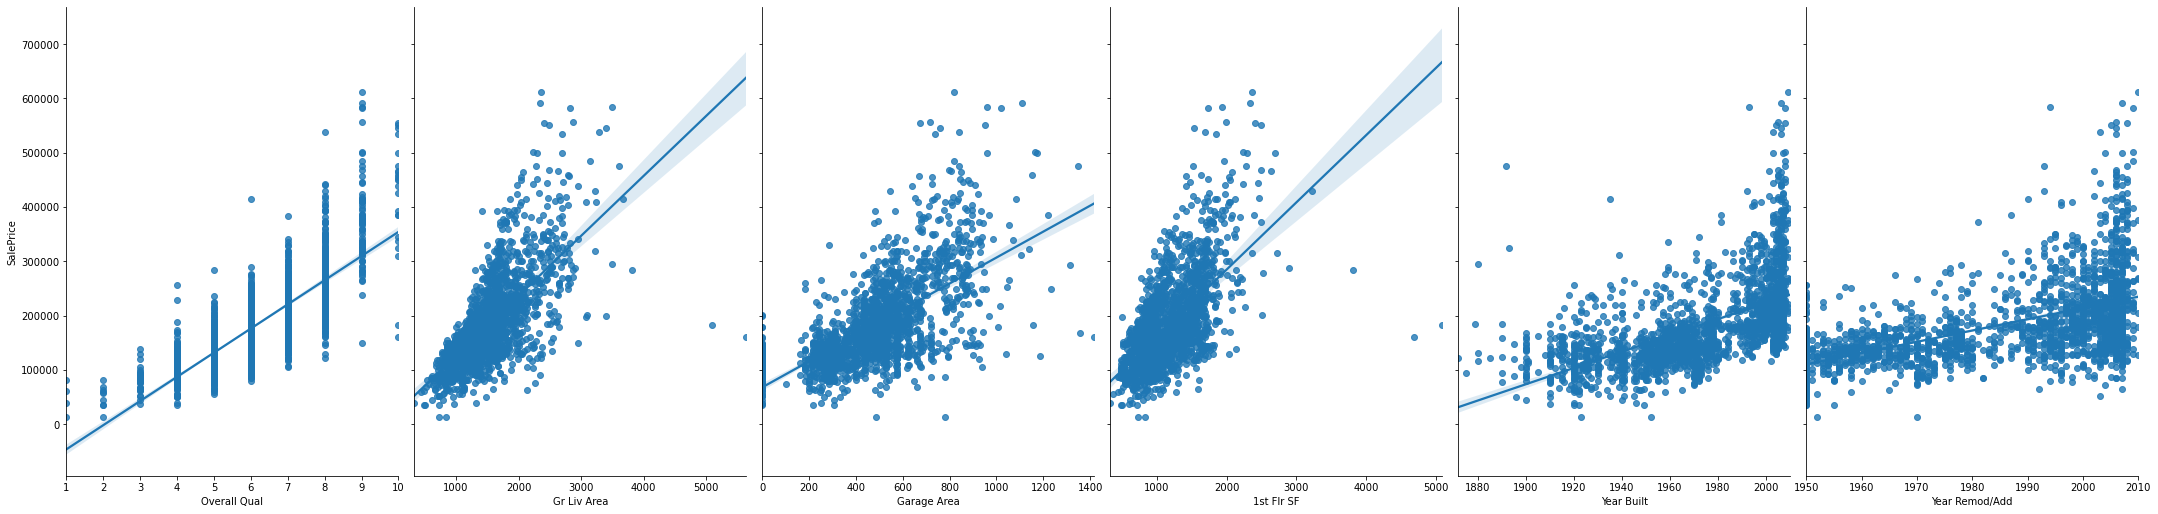

In [64]:
sns.pairplot(df, x_vars=secondpoke, y_vars='SalePrice', size=7, aspect=0.7, kind='reg')